In [1]:
from src.plot import plot_single_bath, plot_all_params, save_individual_run, save_bath, plot_conductivity_fft, plot_voltage_fft, plot_avg_fft_bars
from src.load_data import load_sheet, clean_sheet_with_label

%load_ext autoreload
%matplotlib
%autoreload 2

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
internal_df, sheet1 = load_sheet("Electroplate Experiments Data JUN_JUL", "vary_internal_table")
internal_df = clean_sheet_with_label(internal_df)
internal_df.head()

,run_id,timestamp,time,time_total,area,cathode,anode,mass_SLS,mass_NISO4,mass_NICL2,...,pH,Anomaly P,temperature,Anomaly T,voltage,Anomaly V,current,amp_hour,deposition_rate,bath_id
0,JUL_3_1,2025-07-03 11:21:05,1,1,67,Brass,Nickel,0.8,270.0,40.0,...,4.02,,50.36,,3.649,,2.342,0.001,0.6289,Fresh
1,JUL_3_1,2025-07-03 11:21:06,1,2,67,Brass,Nickel,0.8,270.0,40.0,...,4.02,,50.35,,3.568,,2.342,0.001,0.6289,Fresh
2,JUL_3_1,2025-07-03 11:21:07,1,3,67,Brass,Nickel,0.8,270.0,40.0,...,4.02,,50.35,,3.509,,2.342,0.002,0.6289,Fresh
3,JUL_3_1,2025-07-03 11:21:08,1,4,67,Brass,Nickel,0.8,270.0,40.0,...,4.02,,50.35,,3.509,,2.342,0.003,0.6289,Fresh
4,JUL_3_1,2025-07-03 11:21:09,1,5,67,Brass,Nickel,0.8,270.0,40.0,...,4.02,,50.35,,3.475,,2.342,0.003,0.6289,Fresh


/Users/prince_hope/Desktop/pom/python/PlateMon_data_analytics/src/plot.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_df['time_total'] = run_df['time_total'] - run_df['time_total'].iloc[0]


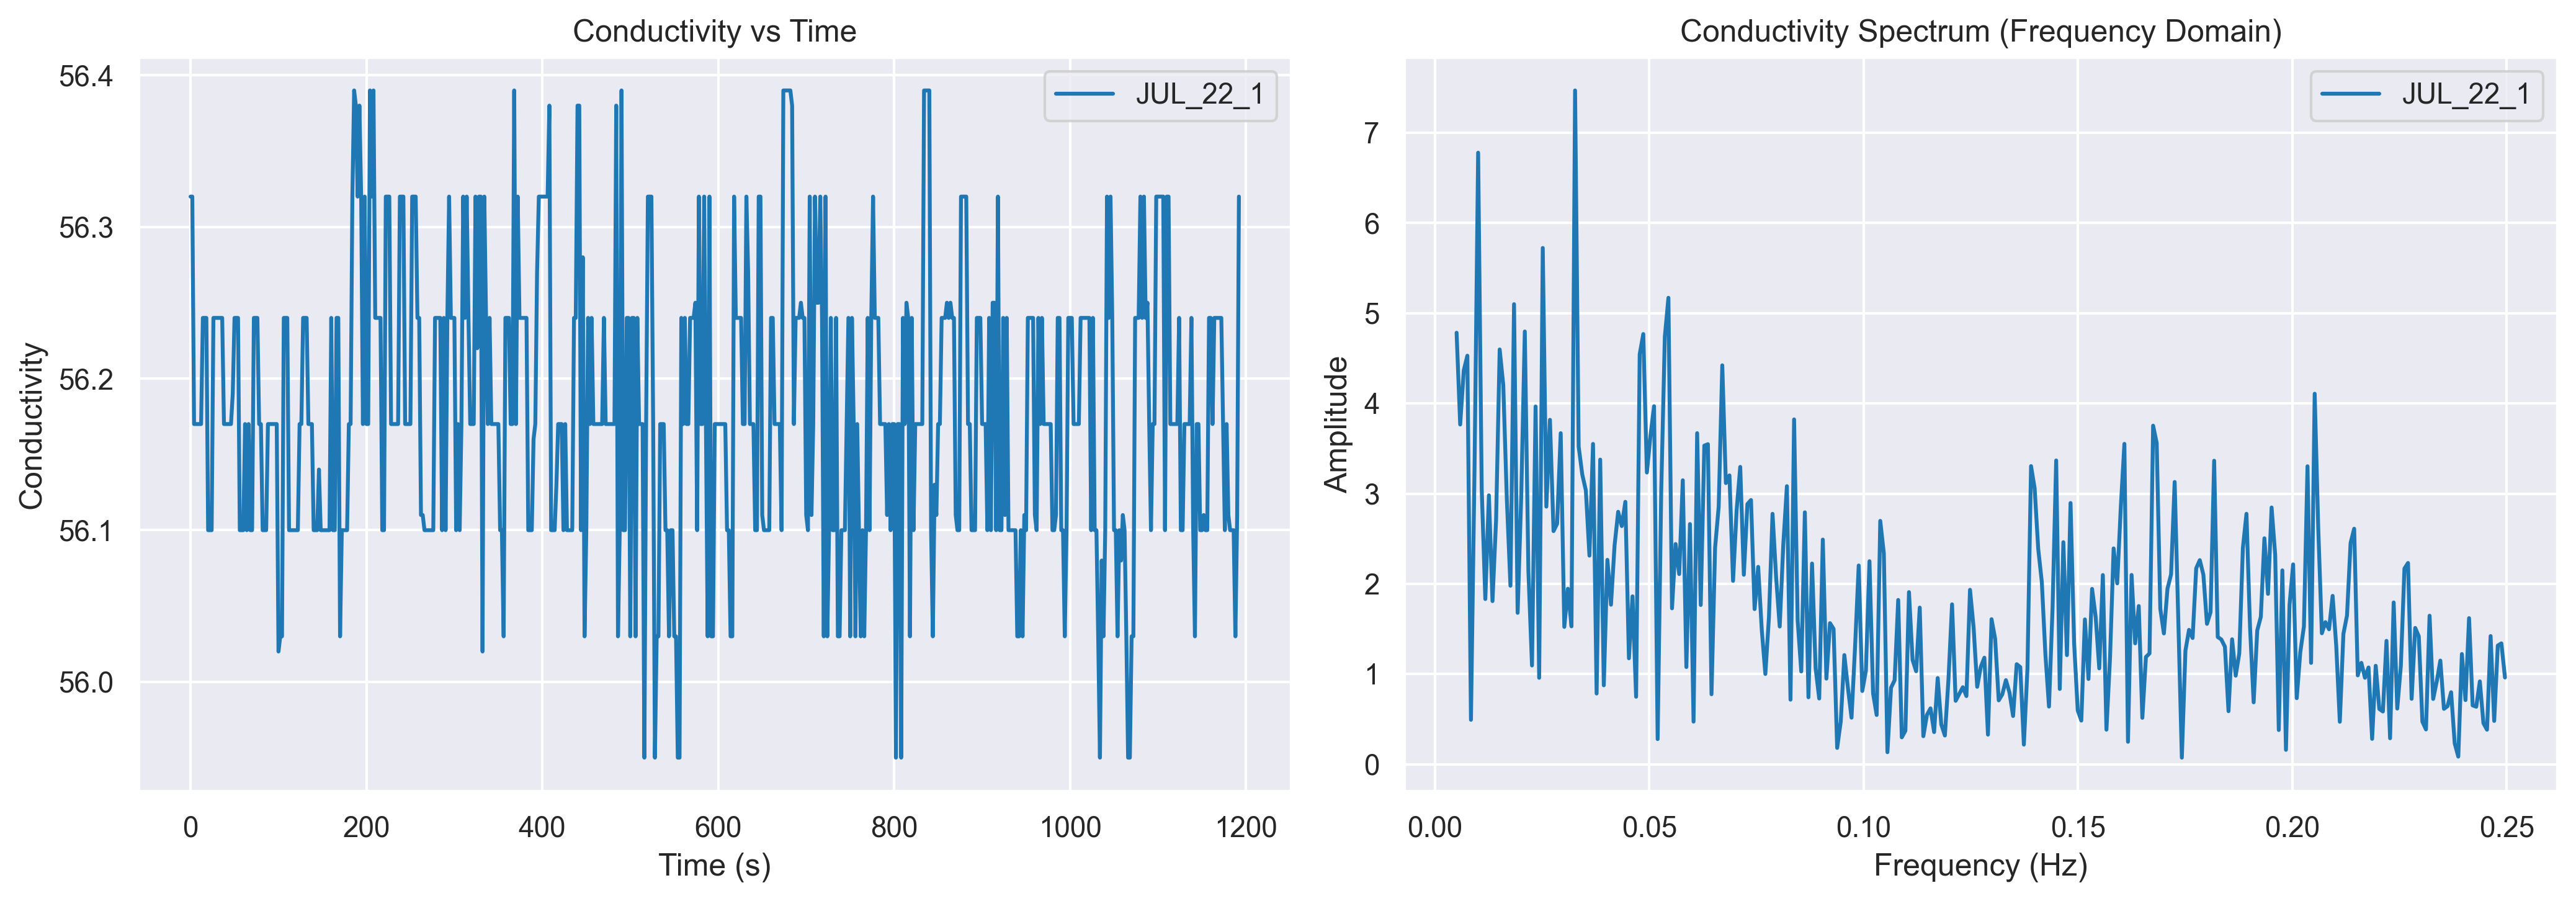

/Users/prince_hope/Desktop/pom/python/PlateMon_data_analytics/src/plot.py:580: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub.groupby("freq_bin")[amp_col]


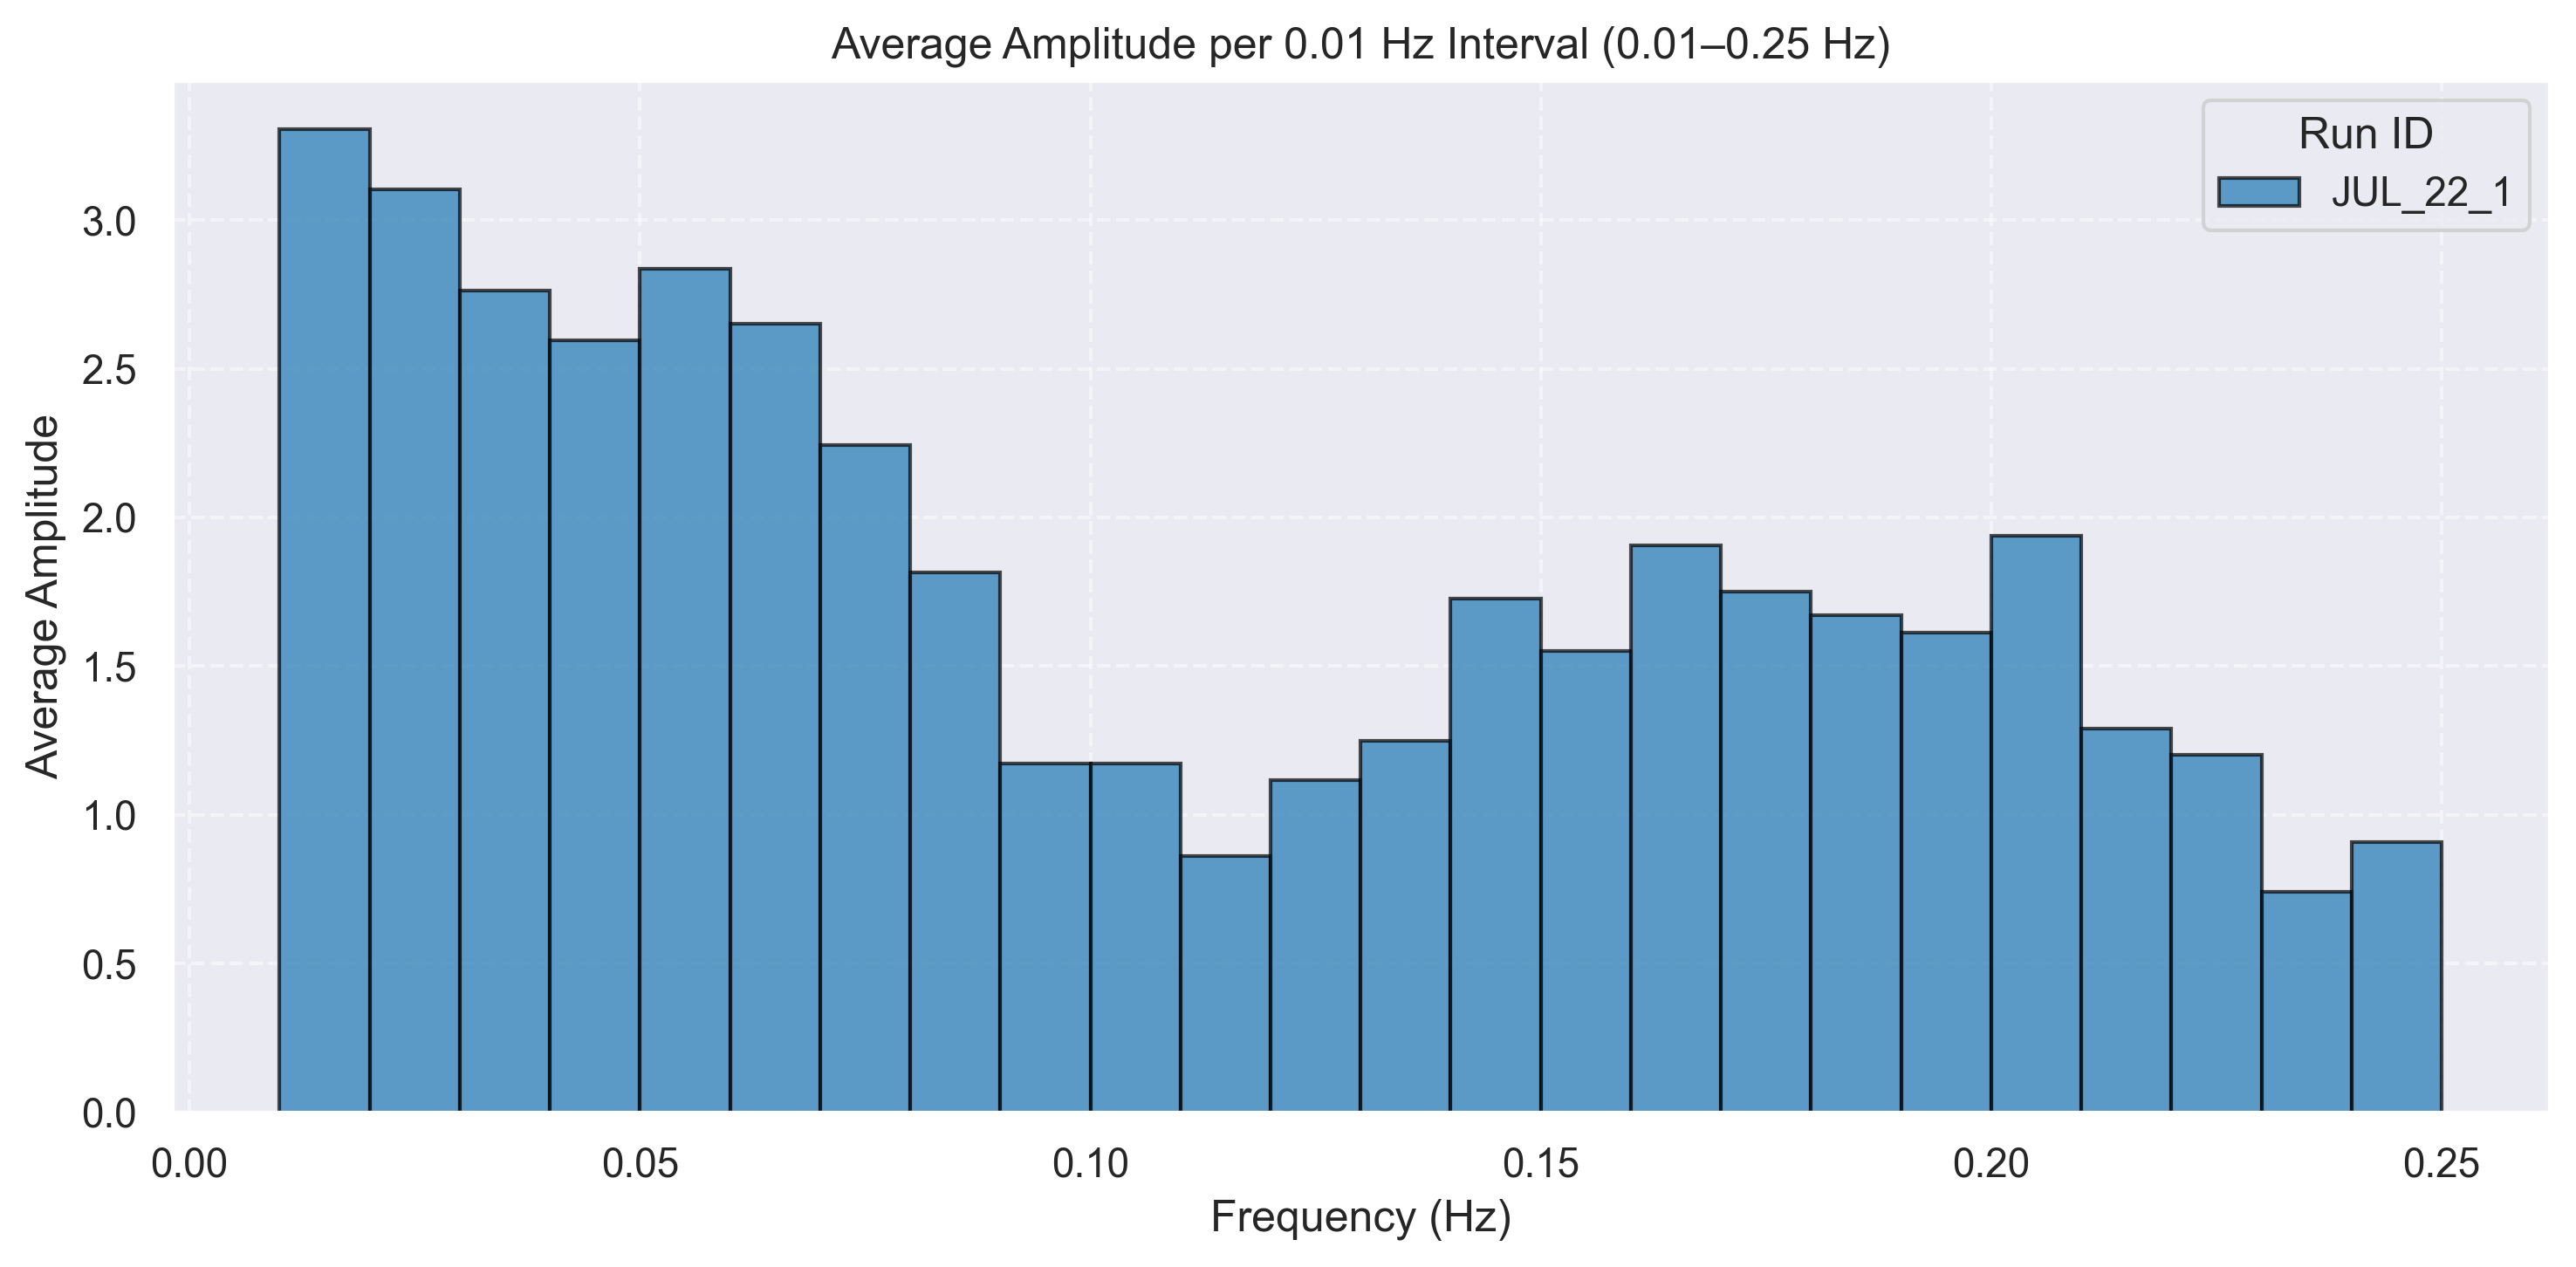

In [3]:
df = plot_conductivity_fft(internal_df,"Bath_3",['JUL_22_1'])
plot_avg_fft_bars(df)